# Using Neural Networks to Recognize Handwritten Digits in TensorFlow and Numpy

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

<a href = 'https://www.kaggle.com/code/midhunlalvs/digit-recognizer-mnist-dataset-with-cnn-98'>Link to dataset</a>

Purpose: To detect a handwritten digit as 0 - 9. 
<ul>
    <li>The csv file in the dataset consists of pixel-values of 28 pixel x 28 pixel images.</li>
    <li>Each pixel-value ranges from 0 to 255. Higher pixel-value indicates a darker pixel.</li>
    <li>Each row represents the pixel-values of 1 image. Pixel x is located at row i and column j where i and j are integers between 0 and 27, and x = 28*i + j</li>
    <li>For each of the 28000 images in the test set, provide a prediction of the ImageID and the digit you predict.</li>
</ul>


#### Import the test and train data as Pandas arrays and convert them to Numpy arrays.

In [26]:
path = 'train.csv'
DFNN = pd.read_csv(path, index_col=0, header=0)
DFNN.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


X-training features - convert these into Numpy arrays:

In [27]:
X_train = DFNN.to_numpy()
X_train.shape

(42000, 784)

Y-training values (the actual digit written):

In [28]:
Y_train = DFNN.index.values
Y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

The test features - convert this into a Numpy array too:

In [29]:
path = 'test.csv'
DFTNN = pd.read_csv(path, index_col=None, header=0)
DFTNN.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X_test = DFTNN.to_numpy()
X_test.shape

(28000, 784)

The number of columns (pixels) is 784. This makes sense: 28*28 = 784.

#### Plot the handdrawn images from the training and testing data sets.

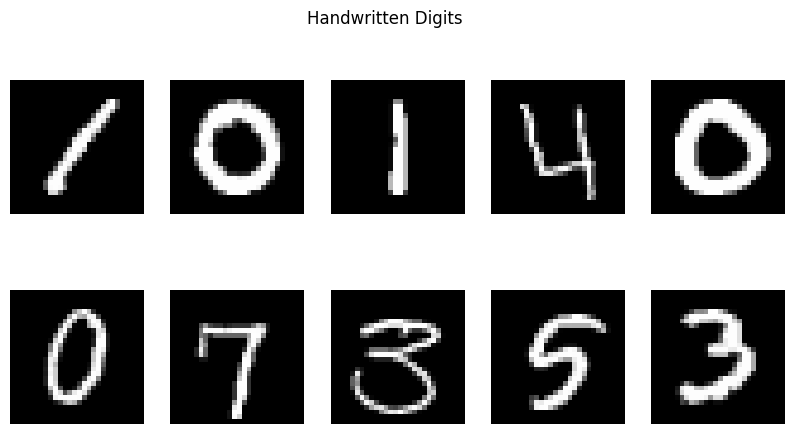

In [31]:
# Create a figure, set the figure height and size in inches.
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Handwritten Digits')

for i in range(10):
    # subplot(nrows, ncols, index, **kwargs)
    # Creates subplots for the figure. There will be nrows of rows and ncols of columns.
    # index starts at 1 in the upper left corner and increases to the right. Note that 1-based indexing is used!
    ax = plt.subplot(2, 5, i + 1)

    # imshow(X, cmap)
    # Displays the data as an image. The cmap will tell MATPLOTLIB what the data represents.
    # If we specify cmap='gray', it'll know that the data is a matrix taking values from 0 to 255 and that each
    # value represents a grayscale pixel intensity.
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')

    # Remove the axes.
    plt.axis('off')

plt.show()

### Use TensorFlow to Build and Train a Neural Network.

In [42]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

The neural network will have 25 units in the first hidden layer, 15 in the second layer, and 10 in the output layer (corresponding to the number of digits available). 
<ul>
    <li>First and second layers: ReLU activation functions will be used.</li>
    <li>Output layer: Softmax activation function will be used.</li>
    <li>In our neural network, we'll call a linear activation function in the output layer.</li>
    <li>Idea: we'll use a linear activation function to train the output layer. When specifying the loss function in the <code>model.compile</code> line, we'll tell TensorFlow that we don't intend to normalize the output values from the output layer by specifying <code>from_logits=True</code>.</li>
    <li>Then we'll predict y-values using the neural network and transform the y-values using the softmax function to get the probabilities of each digit being displayed.</li>
</ul>

Build a neural network model using the sequential function.

In [43]:
model = Sequential([
    tf.keras.layers.Dense(units=25, activation='relu'),
    tf.keras.layers.Dense(units=15, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='linear')
])

Instantiate the model with the X_train features.

In [44]:
model.predict(X_train)

1313/1313 [==============================] - 3s 2ms/step


array([[-1.3029675e+01, -8.5537648e-01,  1.3299062e+01, ...,
        -4.6334274e+01,  6.0954781e+01,  3.5528980e+01],
       [-4.3718410e+01,  5.7654991e+00, -1.2421827e+01, ...,
         5.1191879e+01, -1.4919193e+01, -1.9431627e+02],
       [ 2.8001219e+01, -1.7129383e+01, -1.1086720e+00, ...,
         1.2918143e+01,  1.5968605e+01, -3.8567509e+01],
       ...,
       [ 3.0577110e+01,  8.2417908e+01,  5.7976746e+01, ...,
         5.3845544e+00, -5.4793343e+01, -1.4029944e+02],
       [-3.6822201e+01,  1.1583247e+02, -7.9524796e+01, ...,
         6.0074234e+01, -1.7842768e+01, -9.8060827e+00],
       [ 2.3909132e+01,  3.7105812e+01,  1.9648922e+01, ...,
         2.9942507e+01,  4.1389477e+01, -7.3152870e-02]], dtype=float32)

Then create the corresponding loss function using TensorFlow.
<font color='red'>Question: Explanation of the Adam optimizer needed - I'll check this up later.</font>

In [45]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),)

Train the model using 10 epochs. Remember that there are 42000 training examples. Tensorflow divides the 42000 examples into batches of 32 training examples. Each epoch will therefore require 42000/32 = 1313 iterations of gradient descent to cover all the examples.

In [46]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 2.3324
Epoch 2/10
1313/1313 [==============================] - 3s 3ms/step - loss: 1.0868
Epoch 3/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.8289
Epoch 4/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.6836
Epoch 5/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.6113
Epoch 6/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.5173
Epoch 7/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4524
Epoch 8/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.4097
Epoch 9/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3847
Epoch 10/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3683


Now let's check the results. Enter the X_train feature into the model and determine the corresponding values.

In [47]:
y = model.predict(X_train)

1313/1313 [==============================] - 3s 2ms/step


In [48]:
y.shape

(42000, 10)

In [49]:
y[0:5,:]

array([[-2.0755043 , 19.070848  , 12.4756775 , 10.245632  , 12.414953  ,
         9.054165  , 10.406963  , 11.851377  , 14.444374  ,  5.507158  ],
       [17.09545   ,  5.776315  ,  8.472495  ,  5.00457   ,  6.151808  ,
         7.278847  ,  8.768173  ,  4.3519883 ,  5.6313114 ,  3.6801825 ],
       [ 1.844868  , 43.137054  , 11.12087   , 12.073205  , 20.163177  ,
         1.7137817 , 18.783619  , 16.425577  ,  7.2437935 , 20.211338  ],
       [ 3.660014  ,  2.1451888 ,  6.2194715 , -0.15845442,  5.7100754 ,
         2.9198089 ,  7.0170064 ,  2.5276237 ,  4.7820377 ,  0.33151388],
       [23.74052   , 10.619977  , 14.7192745 , 15.205649  ,  8.186918  ,
        17.705364  , 13.160167  , 14.337533  , 14.133739  , 13.26791   ]],
      dtype=float32)

Notice that the values above aren't probabilities. We'll have to convert these into probabilities using the softmax function:

In [50]:
sm = tf.nn.softmax(y).numpy()

In [51]:
sm.shape

(42000, 10)

In [52]:
sm[0:5,:]

array([[6.46270870e-10, 9.86640394e-01, 1.34869118e-03, 1.45016078e-04,
        1.26922992e-03, 4.40522927e-05, 1.70404630e-04, 7.22407247e-04,
        9.65843163e-03, 1.26917962e-06],
       [9.99473631e-01, 1.21320454e-05, 1.79833194e-04, 5.60749822e-06,
        1.76607100e-05, 5.45098483e-05, 2.41702553e-04, 2.91982155e-06,
        1.04944447e-05, 1.49140271e-06],
       [1.16689335e-18, 1.00000000e+00, 1.24608355e-14, 3.22954384e-14,
        1.05334831e-10, 1.02353313e-18, 2.65116852e-11, 2.50814625e-12,
        2.58080272e-16, 1.10531959e-10],
       [1.83325056e-02, 4.03033942e-03, 2.37017334e-01, 4.02607722e-04,
        1.42413840e-01, 8.74490011e-03, 5.26193082e-01, 5.90787083e-03,
        5.63002862e-02, 6.57162280e-04],
       [9.97092366e-01, 1.99781744e-06, 1.20464218e-04, 1.95924149e-04,
        1.75344354e-07, 2.38616415e-03, 2.53364742e-05, 8.22374859e-05,
        6.70754234e-05, 2.82187957e-05]], dtype=float32)

The matrix sm contains the probabilities that each training example represents a given digit. For instance:
<code>np.array([[0 1 0 0 0 0 0 0 0 0], [1 0 0 0 0 0 0 0 0 0]])</code>
The first training example is a 1, the second is a 0.

For each row in the numpy array sm, let's determine the index of the '1' value.

In [56]:
labels = np.argmax(sm, axis=1)
labels.shape

(42000,)

In [57]:
labels

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

Let's compare the predicted values with the handwritten digits.

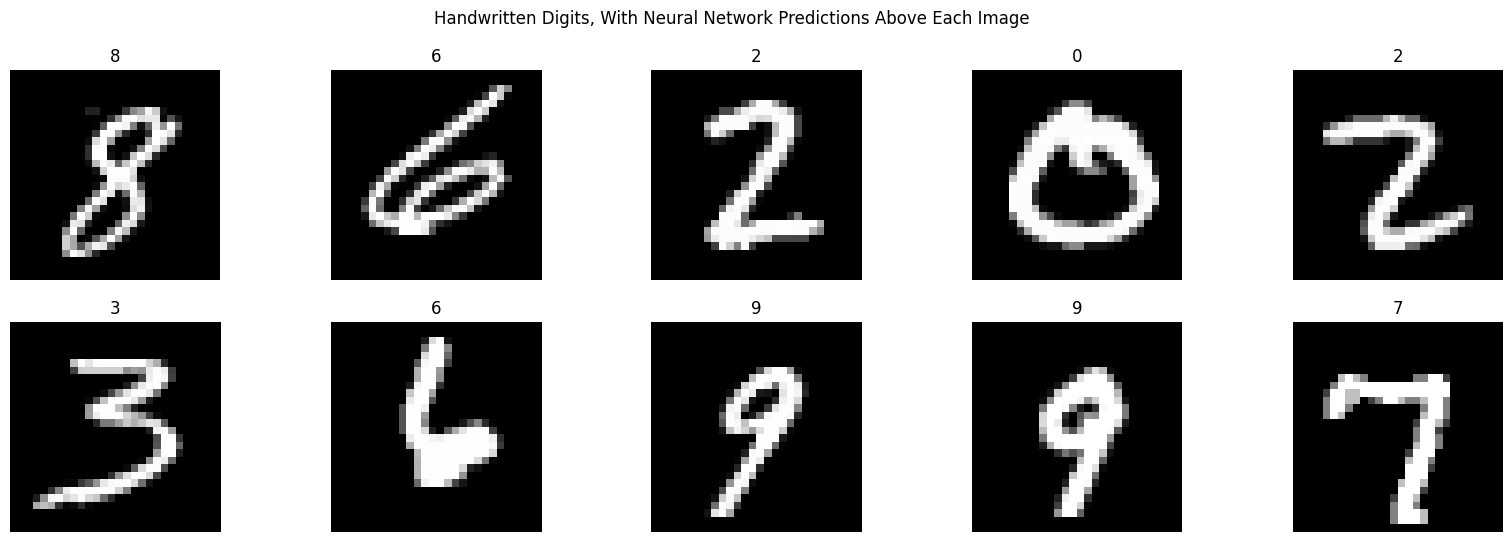

In [74]:
# Set the size of the figure.
fig = plt.figure(figsize=(20, 6))
list = np.arange(0,10,1)

# Set the title of the figure.
fig.suptitle("Handwritten Digits, With Neural Network Predictions Above Each Image")
for i in list:
    # subplot(nrows, ncols, index, **kwargs)
    # Creates subplots for the figure. There will be nrows of rows and ncols of columns.
    # index starts at 1 in the upper left corner and increases to the right. Note that 1-based indexing is used!
    plt.subplot(2, 5, i+1)

    # imshow(X, cmap)
    # Displays the data as an image. The cmap will tell MATPLOTLIB what the data represents.
    # If we specify cmap='gray', it'll know that the data is a matrix taking values from 0 to 255 and that each
    # value represents a grayscale pixel intensity.
    plt.imshow(X_train[i+20].reshape(28,28), cmap='gray')
    plt.title(labels[i+20])

    # Remove the axes.
    plt.axis('off')

plt.show()

Now let's make predictions using the test data.

In [75]:
yhat2 = model.predict(X_test)

875/875 [==============================] - 2s 2ms/step


Convert yhat2 values into probabilities using the softmax function.

In [76]:
sm2 = tf.nn.softmax(yhat2).numpy()

In [77]:
sm2.shape

(28000, 10)

In [78]:
sm2[0:5,:]

array([[5.6074906e-12, 1.1888098e-07, 9.9999976e-01, 4.3724344e-09,
        5.7154653e-14, 3.1765221e-10, 6.5193113e-08, 2.1099797e-09,
        3.1021881e-09, 8.6776391e-18],
       [9.5689857e-01, 4.2935444e-05, 5.2969507e-04, 6.9434638e-03,
        2.5160932e-06, 2.5387069e-02, 2.4355017e-04, 2.7342075e-03,
        2.0367249e-03, 5.1812665e-03],
       [3.3972428e-05, 6.0231672e-03, 4.7255686e-04, 2.0004606e-02,
        3.0274287e-01, 1.9907488e-02, 1.4589186e-04, 2.0115037e-02,
        9.5093168e-02, 5.3546131e-01],
       [8.1651303e-04, 1.2167546e-02, 1.5945819e-01, 1.4677254e-04,
        4.5093104e-01, 1.5972019e-03, 2.5567812e-01, 5.9103776e-02,
        5.7526268e-02, 2.5745714e-03],
       [5.8313638e-08, 3.1570359e-03, 9.7385550e-01, 1.6561629e-03,
        2.6509889e-07, 2.7177081e-04, 2.7577546e-05, 2.7570353e-04,
        2.0755740e-02, 5.5280839e-08]], dtype=float32)

In [79]:
labels2 = np.argmax(sm2, axis=1)

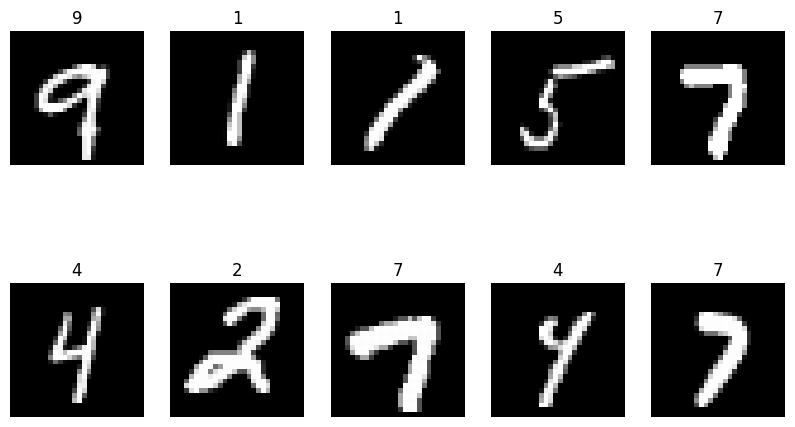

In [80]:
plt.figure(figsize=(10, 6))
for i in range(10):
    # subplot(nrows, ncols, index, **kwargs)
    # Creates subplots for the figure. There will be nrows of rows and ncols of columns.
    # index starts at 1 in the upper left corner and increases to the right. Note that 1-based indexing is used!
    plt.subplot(2, 5, i + 1)

    # imshow(X, cmap)
    # Displays the data as an image. The cmap will tell MATPLOTLIB what the data represents.
    # If we specify cmap='gray', it'll know that the data is a matrix taking values from 0 to 255 and that each
    # value represents a grayscale pixel intensity.
    plt.imshow(X_test[i+20].reshape(28,28), cmap='gray')
    plt.title(labels2[i+20])

    # Remove the axes.
    plt.axis('off')

plt.show()

## Let's Re-implement the Same Neural Network In Python
i.e. No TensorFlow, Numpy Only.

#### Forward Propagation:

##### 1st, let's create a function that defines the neural network.

In [141]:
def forwardprop_NM(X, W1, b1, W2, b2, W3, b3, dense_RELU, dense_SOFTMAX):
    """
    Applies the forward propagation algorithm of the given neural network onto the training examples.
    Args:
    X (ndarray (m, n)) : the feature of training examples. m = # of training examples, n = # of features. 
                         In our case, X is a (42000, 784) Numpy array.
    W1 (ndarray (n, p)) : the parameter matrix for the first layer. n = # of features, p = # of neurons of given layer.
    b1 (ndarray (p, 1)) : the parameter vector for the first layer. p = # of neurons of given layer.
    W2, b2 : the parameter matrix and vector for the second layer.
    dense_RELU : a function that computes the output row vector of each hidden layer using the RELU function.
    dense_SOFTMAX :  a function that computes the output row vector of the output layer using the SOFTMAX function.
    
    Returns:
    a3 (nd array (10,)) : a row vector consisting of the probabilities that y = 0, y = 1, ... y = 9
    """
    a1, z1 = dense_RELU(X, W1, b1, relu)
    a2, z2 = dense_RELU(a1, W2, b2, relu)
    a3, z3 = dense_SOFTMAX(a2, W3, b3, softmax)
    
    return a3, z3, a2, z2, a1, z1

##### 2nd, let's define the RELU function.

In [142]:
def relu(z):
    """
    Computes an output value using the RELU function
    Args:
    z (ndarray (m,n)) : an input numpy array.

    Returns:
    np.maximum(0,z) (ndarray (m,n)) : Relu(z)
    """
    return np.maximum(0,z)

Check that the RELU function works.

In [143]:
r = np.array([[-1, 0, 1, 2, 3, 4], [-2, -1, 0, 1, 2, 3]])
r

array([[-1,  0,  1,  2,  3,  4],
       [-2, -1,  0,  1,  2,  3]])

In [144]:
relu(r) # Matches the expected result!

array([[0, 0, 1, 2, 3, 4],
       [0, 0, 0, 1, 2, 3]])

##### 3rd, let's define the dense_RELU function.

In [145]:
def dense_RELU(X, W, b, relu):
    """
    Computes a matrix 'a' whose rows correspond to the output row vector of a training example for the given neural network layer.
    Args:
    X (ndarray (m,n)) : the feature matrix or the input matrix of the given layer. m = # of training examples, n = # of features (if 
                        the feature matrix is the input) or # of units from the previous layer (if the input matrix is the output matrix
                        of the previous hidden layer).
    W (ndarray (n,p)) : the parameter matrix. n = # of features or the # of units from the previous layer. p = # of units of the given 
                        hidden layer.
    b (ndarray (p,)) : the parameter row vector. p = # of units of the given hidden layer
    relu  : the relu activation function

    Returns:
    a_out (ndarray (m,p)) : the output matrix of the given hidden layer. Each row is the output row vector of a given example.
    """
    z_out = np.matmul(X,W)+b
    a_out = relu(z_out)
    
    return a_out, z_out
    
    

Check that the function above is defined properly:

In [146]:
r = np.array([[-1, 0, 1, 2, 3, 4], [-2, -1, 0, 1, 2, 3]]) # m = 2 examples, n = 6 features
W = np.array([[1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]]) # n = 6 features, p = 2 units
b = np.array([2, 2]) # p = 2 units

result = relu(np.matmul(r,W)+b)
result # should result in a m = 2 examples x p = 2 units matrix.

array([[11, 11],
       [ 5,  5]])

In [147]:
check, z = dense_RELU(r,W,b,relu)
check

array([[11, 11],
       [ 5,  5]])

##### 4th, define the softmax function.

In [148]:
def softmax(z):
    """
    Computes an output value using the SOFTMAX function
    Args:
    z (ndarray (m,n)) : an input numpy array.

    Returns:
    np.maximum(0,z) (ndarray (m,n)) : Relu(z)
    """
    return np.exp(z)/np.exp(z).sum(axis=1)[:,None]

Check if the function is defined properly:

In [149]:
r = np.array([[-1, 0, 1, 2, 3, 4], [0, -1, 0, 2, 2, 5]])
r

array([[-1,  0,  1,  2,  3,  4],
       [ 0, -1,  0,  2,  2,  5]])

In [150]:
# row 1
SUM1 = sum(np.exp(r[0,:]))

# row 2
SUM2 = sum(np.exp(r[1,:]))

Row1 = (np.exp(r[0,:]))/SUM1
Row2 = (np.exp(r[1,:]))/SUM2
print(Row1)
print(Row2)

[0.00426978 0.01160646 0.03154963 0.08576079 0.23312201 0.63369132]
[0.00604014 0.00222204 0.00604014 0.04463091 0.04463091 0.89643586]


In [151]:
softmax(r)

array([[0.00426978, 0.01160646, 0.03154963, 0.08576079, 0.23312201,
        0.63369132],
       [0.00604014, 0.00222204, 0.00604014, 0.04463091, 0.04463091,
        0.89643586]])

##### 5th, define the dense_SOFTMAX function.

In [152]:
def dense_SOFTMAX(X, W, b, softmax):
    """
    Computes a matrix 'a' whose rows correspond to the output row vector of a training example for the given neural network layer.
    Args:
    X (ndarray (m,n)) : the input matrix of the given layer. m = # of training examples, n = # of units from the previous layer
                        (if the input matrix is the output matrix of the previous hidden layer).
    W (ndarray (n,p)) : the parameter matrix. n = # of features or the # of units from the previous layer. p = # of units of the given 
                        hidden layer.
    b (ndarray (p,)) : the parameter row vector. p = # of units of the given hidden layer
    softmax  : the softmax activation function

    Returns:
    a_out (ndarray (m,p)) : the output matrix of the given hidden layer. Each row is the output row vector of a given example.
    """
    z_out = np.matmul(X,W)+b
    a_out = softmax(z_out)
    
    return a_out, z_out

##### 6th, apply forward propagation to the training set. Use dummy matrices for W and b.

Set the W and b parameter matrices to small dummy values. Use the numpy random.randn random number generator to obtain random values. Subtract by 0.5 to reduce the size of the matrix - note I heard about this online and need more backup regarding this...

In [175]:
units1=25
units2 = 15
units_out = 10

#X_tee = np.array([[0, 0, 2, 0, 3, 0, 0, 1], [0, 1, 2, 3, 4, 0, 3, 0]])
W1 = np.random.randn(X_train.shape[1], units1) - 0.5
b1 = np.random.randn(units1,) - 0.5
W2 = np.random.randn(units1, units2) - 0.5
b2 = np.random.randn(units2,) - 0.5
W3 = np.random.randn(units2, units_out) - 0.5
b3 = np.random.randn(units_out,) - 0.5

a3, z3, a2, z2, a1, z1 = forwardprop_NM(X_train, W1, b1, W2, b2, W3, b3, dense_RELU, dense_SOFTMAX)
a3.shape


(42000, 10)

Let's check to ensure that our function is correct.

Function output:

In [187]:
a3[0:2,:]

array([[0.11149586, 0.02098922, 0.06362013, 0.29339829, 0.03474147,
        0.07863478, 0.35495959, 0.02209793, 0.00524558, 0.01481716],
       [0.11149586, 0.02098922, 0.06362013, 0.29339829, 0.03474147,
        0.07863478, 0.35495959, 0.02209793, 0.00524558, 0.01481716]])

Let's calculate a3 using the dense_RELU, dense_SOFTMAX functions. The final result matches what we calculated above.

In [189]:
a1 = dense_RELU(X_train[0:2,:], W1, b1, relu)
a1

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [190]:
a2 = dense_RELU(a1, W2, b2, relu)
a2

array([[0.51203281, 0.        , 0.        , 0.        , 0.        ,
        0.42365655, 1.57725745, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.51203281, 0.        , 0.        , 0.        , 0.        ,
        0.42365655, 1.57725745, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

In [197]:
a3 = dense_SOFTMAX(a2, W3, b3, softmax)
a3

array([[0.11149586, 0.02098922, 0.06362013, 0.29339829, 0.03474147,
        0.07863478, 0.35495959, 0.02209793, 0.00524558, 0.01481716],
       [0.11149586, 0.02098922, 0.06362013, 0.29339829, 0.03474147,
        0.07863478, 0.35495959, 0.02209793, 0.00524558, 0.01481716]])

Let's now calculate a3 'by hand' (using Numpy mathematical operators) and check the result. The result also matches our output from above.

In [198]:
z = np.matmul(a2, W3) + b3
z

array([[-0.60760167, -2.27758   , -1.1686592 ,  0.35994197, -1.77365498,
        -0.95677505,  0.55041487, -2.22610528, -3.66420288, -2.6258033 ],
       [-0.60760167, -2.27758   , -1.1686592 ,  0.35994197, -1.77365498,
        -0.95677505,  0.55041487, -2.22610528, -3.66420288, -2.6258033 ]])

In [199]:
np.exp(z)

array([[0.54465557, 0.10253203, 0.31078336, 1.43324623, 0.16971156,
        0.38412969, 1.73397224, 0.10794804, 0.02562459, 0.07238159],
       [0.54465557, 0.10253203, 0.31078336, 1.43324623, 0.16971156,
        0.38412969, 1.73397224, 0.10794804, 0.02562459, 0.07238159]])

In [200]:
np.exp(z).sum(axis=1)

array([4.88498491, 4.88498491])

In [202]:
np.exp(z)/np.exp(z).sum(axis=1)[:,None]

array([[0.11149586, 0.02098922, 0.06362013, 0.29339829, 0.03474147,
        0.07863478, 0.35495959, 0.02209793, 0.00524558, 0.01481716],
       [0.11149586, 0.02098922, 0.06362013, 0.29339829, 0.03474147,
        0.07863478, 0.35495959, 0.02209793, 0.00524558, 0.01481716]])

#### Back Propagation to Calculate the Derivatives:

<a href='http://cs229.stanford.edu/notes2020spring/cs229-notes-deep_learning.pdf'>See this link for the derivatives required to do back propagation</a>

##### 1st, convert the y-labels into binary notation.

In [204]:
Y_train[0:5]

array([1, 0, 1, 4, 0], dtype=int64)

In [207]:
Y_train.shape[0]

42000

In [216]:
def binary(Y):
    """
    Converts the vector Y into a binary matrix.
    Args:
    Y : a row vector with the labels that each training example represent.

    Returns:
    Y_binary : a matrix with the labels from Y converted into binary.
    """
    
    # Initiate a zero matrix with number of rows equal to the number of training examples and number of columns equal to 10
    Y_binary = np.zeros((Y.shape[0], 10))

    # Create a set of labels - these refer to the row indices of the matrix Y.
    LabelM = np.arange(0,Y.shape[0],1)

    # Within Y_binary, assign the value 1 based on the values in Y.
    Y_binary[LabelM[:,], Y[:,]] = 1
    
    return Y_binary

Check that the code works:

In [217]:
Y = np.array([1, 0, 4, 5])
binary(Y)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

##### 2nd, define the derivatives.

In [218]:
def back_propagation(X, Y, a3, a2, z2, a1, z1):
    """
    Computes all the derivatives required per iteration of gradient descent.
    """
    # Compute dJ_dz3. Size: (42000,)
    LabelM = np.arange(0,Y.shape[0],1)
    dJ_dz3 = (a3 - binary(Y))[LabelM[:,], Y[:,]] # Extract only the value where binary(Y) = 1 in each row
    
    # Compute dJ_dw3. Size: (15,)
    dJ_dw3 = dJ_dz3.dot(a2.T)
    dJ_db3 = dJ_dz3
    
    # Compute dJ_dz2, dJ_dw2, dJ_db2
    dJ_dz2 = W3.T.dot(dJ_dz3)*ReLU_dz(z2)
    dJ_dw2 = dJ_dz2.dot(a1.T)
    dJ_db2 = dJ_dz2
    #
    dJ_dz1 = W2.T.dot(dJ_dz2)*ReLU_dz(z1)
    dJ_dw1 = dJ_dz1.dot(X.T)
    dJ_db = dJ_dz1
    
    return dJ_dw3, dJ_db3, dJ_dw2, dJ_db2, dJ_dw1, dJ_db